In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [32]:
# Importing the iris dataset
df = pd.read_csv("iris.csv")
x = df.iloc[:, :-1]
y = df.iloc[:, -1]



In [7]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)


In [8]:

# Convert to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)


In [9]:

# Normalize the data
scaler = Normalizer().fit(x_train)  # The scaler is fitted to the training set
normalized_x_train = scaler.transform(x_train)  # Apply the scaler to the training set
normalized_x_test = scaler.transform(x_test)  # Apply the scaler to the test set

# Selecting the value of K
k = 3


In [10]:

# Euclidean Distance
def distance_ecu(x_train, x_test_point):
    distances = []  # Create an empty list called distances
    for row in range(len(x_train)):  # Loop over the rows of x_train
        current_train_point = x_train[row]  # Get the point by point
        current_distance = 0  # Initialize the distance by zero

        for col in range(len(current_train_point)):  # Loop over the columns of the row
            current_distance += (current_train_point[col] - x_test_point[col]) ** 2

        current_distance = np.sqrt(current_distance)
        distances.append(current_distance)  # Append the distances

    # Store distances in a dataframe
    distances = pd.DataFrame(data=distances, columns=['dist'])
    return distances


In [11]:

# Sorting distances & selecting nearest neighbors
def nearest_neighbors(distance_point, K):
    # Sort values using the sort_values function
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)

    # Take only the first K neighbors
    df_nearest = df_nearest[:K]
    return df_nearest


In [12]:

# Assigning class label based on the majority vote
def voting(df_nearest, y_train):
    # Use the Counter Object to get the labels with K nearest neighbors
    counter_vote = Counter(y_train[df_nearest.index])

    # Majority Voting
    y_pred = counter_vote.most_common()[0][0]

    return y_pred


In [13]:

# Making predictions for the test set
y_pred_scratch = []
for point in normalized_x_test:
    distances = distance_ecu(normalized_x_train, point)
    nearest = nearest_neighbors(distances, k)
    y_pred = voting(nearest, y_train)
    y_pred_scratch.append(y_pred)


In [14]:

# Calculate accuracy
accuracy_manual = accuracy_score(y_test, y_pred_scratch)
print(f'The accuracy of the manual KNN implementation is {accuracy_manual:.2f}')


The accuracy of the manual KNN implementation is 0.97


In [25]:
from sklearn.preprocessing import LabelEncoder

# Create and fit encoder on all label values
encoder = LabelEncoder()
encoder.fit(np.concatenate([y_train, y_test]))

# Convert string labels to numeric for plotting
y_test_numeric = encoder.transform(y_test)
y_pred_numeric = encoder.transform(np.array(y_pred_scratch))


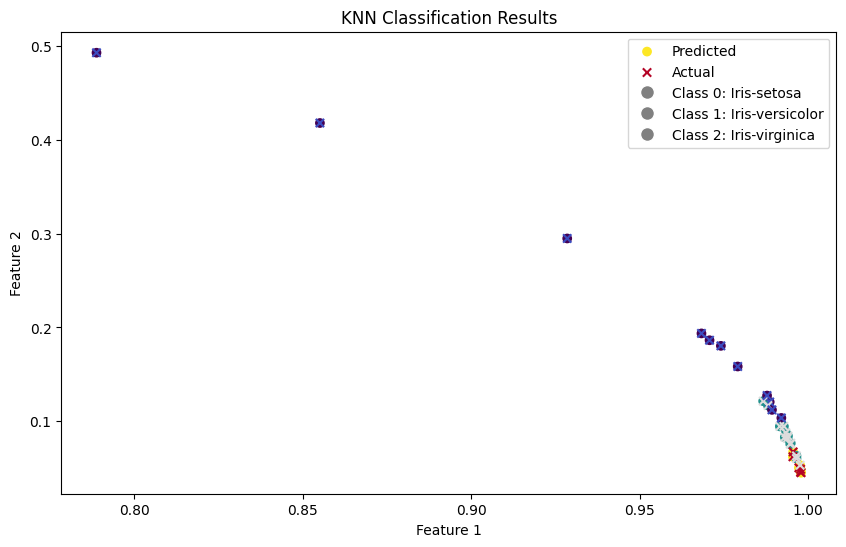

In [28]:
# Get class names in correct encoded order
class_names = encoder.classes_

plt.figure(figsize=(10, 6))

# Predicted points
scatter_pred = plt.scatter(
    normalized_x_test[:, 0],
    normalized_x_test[:, 1],
    c=y_pred_numeric,
    cmap='viridis',
    marker='o',
    label='Predicted'
)

# Actual points
scatter_actual = plt.scatter(
    normalized_x_test[:, 0],
    normalized_x_test[:, 1],
    c=y_test_numeric,
    cmap='coolwarm',
    marker='x',
    label='Actual'
)

plt.title('KNN Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# -------- Add class legend --------
# Create legend handles for classes
class_handles = [
    plt.Line2D(
        [0], [0],
        marker='o',
        color='w',
        markerfacecolor='gray',
        markersize=10,
        label=f"Class {i}: {class_names[i]}"
    )
    for i in range(len(class_names))
]

# Combine legends: predictions, actual, and class list
plt.legend(handles=[scatter_pred, scatter_actual] + class_handles)

plt.show()



In [24]:
# Taking some test data and giving output
test_data = normalized_x_test[:100]
test_predictions = []

# True labels for the selected test samples
true_labels = y_test[:100]

for point in test_data:
    distances = distance_ecu(normalized_x_train, point)
    nearest = nearest_neighbors(distances, k)
    y_pred = voting(nearest, y_train)
    test_predictions.append(y_pred)

print("Test Data Predictions:")
for i, pred in enumerate(test_predictions):
    true_class = true_labels[i]
    print(f"Test Data Point {i+1}: Predicted Class - {pred} | True Class - {true_class}")


Test Data Predictions:
Test Data Point 1: Predicted Class - Iris-virginica | True Class - Iris-virginica
Test Data Point 2: Predicted Class - Iris-versicolor | True Class - Iris-versicolor
Test Data Point 3: Predicted Class - Iris-setosa | True Class - Iris-setosa
Test Data Point 4: Predicted Class - Iris-virginica | True Class - Iris-virginica
Test Data Point 5: Predicted Class - Iris-setosa | True Class - Iris-setosa
Test Data Point 6: Predicted Class - Iris-virginica | True Class - Iris-virginica
Test Data Point 7: Predicted Class - Iris-setosa | True Class - Iris-setosa
Test Data Point 8: Predicted Class - Iris-versicolor | True Class - Iris-versicolor
Test Data Point 9: Predicted Class - Iris-versicolor | True Class - Iris-versicolor
Test Data Point 10: Predicted Class - Iris-versicolor | True Class - Iris-versicolor
Test Data Point 11: Predicted Class - Iris-virginica | True Class - Iris-virginica
Test Data Point 12: Predicted Class - Iris-versicolor | True Class - Iris-versicolo